K-Means Clustering
🔹 Definition:
K-Means is an unsupervised machine learning algorithm used for clustering data into K number of distinct groups (clusters) based on feature similarity.

🔹 How it Works:
Choose the number of clusters (K).

Initialize K centroids randomly.

Assign each data point to the nearest centroid (based on Euclidean distance).

Update centroids by calculating the mean of all points in that cluster.

Repeat steps 3 & 4 until centroids do not change significantly or a maximum number of iterations is reached.

🔹 Applications:
Customer segmentation

Image compression

Pattern recognition

Market basket analysis

🔹 Pros:
Simple and fast

Works well with large datasets

Easy to interpret

🔹 Cons:
Must predefine K

Sensitive to outliers

Not ideal for non-spherical clusters

====================================================================================================================================================================================

 Elbow Method
🔹 Definition:
The Elbow Method helps determine the optimal number of clusters (K) in K-Means by analyzing the within-cluster sum of squares (WCSS).

🔹 Steps:
Run K-Means for different values of K (e.g., 1 to 10).

Compute the WCSS for each K.

Plot K vs WCSS.

The “elbow point” in the graph is where the WCSS starts to decrease slowly—that’s the optimal K.

🔹 WCSS (Within-Cluster Sum of Squares):
It measures the compactness of the clusters. Lower WCSS means tighter clusters.

📈 Example:
If the WCSS plot shows a sharp drop from K=1 to K=3 and then flattens out, the elbow is at K=3, so 3 clusters are optimal.



In [1]:
import pandas as pd
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


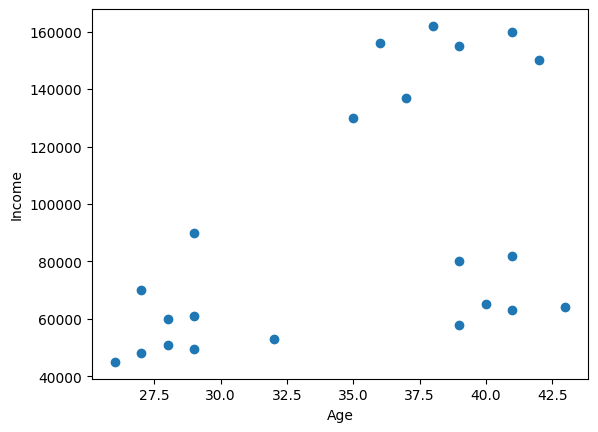

In [3]:
import matplotlib.pyplot as plt

plt.xlabel("Age")
plt.ylabel("Income")

plt.scatter(df['Age'], df['Income($)'])

In [5]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [6]:
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [7]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


Text(0, 0.5, 'Income($)')

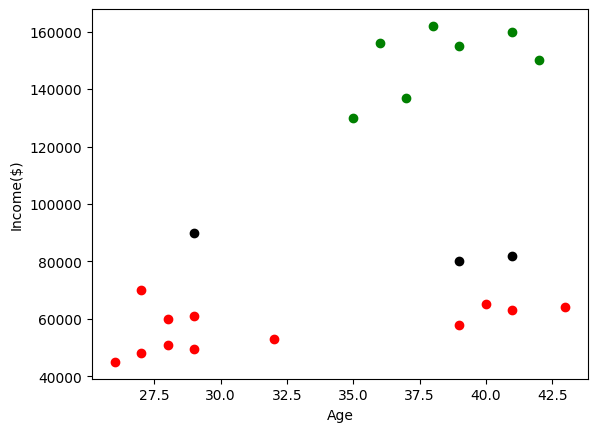

In [8]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
%matplotlib inline
plt.xlabel('Age')
plt.ylabel('Income($)')

Now here the red cluster is fine but there's something wrong with the black and green one

This is happening because our scalling is not right so we will use minmax scaller to fix this

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,1
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,1
3,Ismail,28,0.128205,1
4,Kory,42,0.897436,0


In [11]:
scaler.fit(df[['Age']])                                                                 
df.Age = scaler.transform(df[['Age']])

df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [12]:
km = KMeans(n_clusters=3)
ypred = km.fit_predict(df[['Age','Income($)']])

In [13]:
ypred

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [14]:
df['cluster'] = ypred
df.head(20)

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


Text(0, 0.5, 'Income($)')

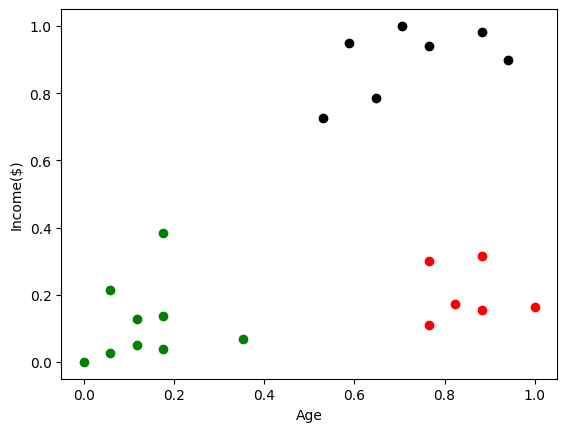

In [15]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
%matplotlib inline
plt.xlabel('Age')
plt.ylabel('Income($)')

In [16]:
km.cluster_centers_ # These are the centroids of the clusters

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

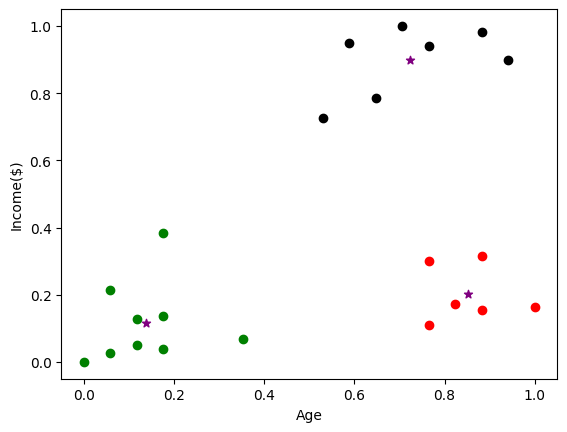

In [18]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
%matplotlib inline
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

In [19]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [20]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.2963623258321303,
 0.2357122039492725,
 0.24432983407231473,
 0.13937852495507835,
 0.13835280821794887]

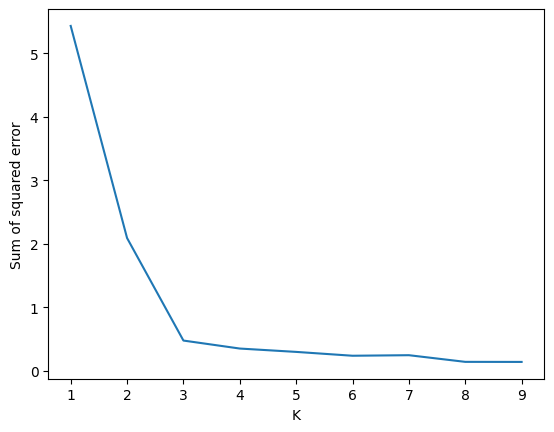

In [21]:
plt.xlabel('K')
plt.ylabel("Sum of squared error")
plt.plot(k_rng,sse)